## Importing Dataset

In [1]:
!pip install kaggle --upgrade

In [2]:
!mkdir ~/.kaggle/

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

 91% 79.0M/86.8M [00:00<00:00, 128MB/s]
100% 86.8M/86.8M [00:00<00:00, 130MB/s]


In [6]:
!mkdir dataset

In [ ]:
!unzip brain-tumor-classification-mri.zip -d dataset

In [ ]:
!ls dataset/Testing/pituitary_tumor/

## Importing Libraries

In [9]:
import matplotlib.pyplot as plt
import numpy as np 
import cv2 as cv
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns

## Working With The Images

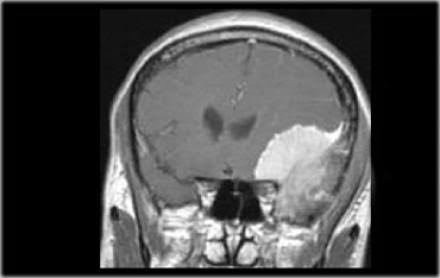

In [10]:
image = np.asarray(PIL.Image.open("dataset/Testing/meningioma_tumor/image(1).jpg"))
im = PIL.Image.fromarray(np.uint8(image))
im

In [11]:
image.shape

(278, 440, 3)

In [12]:
image_size = (150, 150)
image_height = 150
image_width = 150
batch_size = 32

In [13]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory("dataset/Training/", image_size = image_size, batch_size = batch_size,)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory("dataset/Testing/", image_size = image_size, batch_size = batch_size,)

Found 2870 files belonging to 4 classes.
Found 394 files belonging to 4 classes.


In [14]:
image_classes = {
  0 : 'Glioma',
  1 : 'Meningioma',
  2 : 'No Tumor',
  3 : 'Pituitary',
}
class_labels = list(image_classes.values())
num_classes = len(class_labels)

## Exploratory Data Analysis

In [15]:
images_per_class_training = {}
for folder in os.listdir("dataset/Training"):
  images_per_class_training[folder] = len(os.listdir(f'dataset/Training/{folder}'))

print(images_per_class_training)

{'pituitary_tumor': 827, 'meningioma_tumor': 822, 'no_tumor': 395, 'glioma_tumor': 826}


In [16]:
dataset_size = sum(images_per_class_training.values())

for key, index in images_per_class_training.items():
  images_per_class_training[key] = round(images_per_class_training[key]/dataset_size,3)

print(images_per_class_training)

{'pituitary_tumor': 0.288, 'meningioma_tumor': 0.286, 'no_tumor': 0.138, 'glioma_tumor': 0.288}


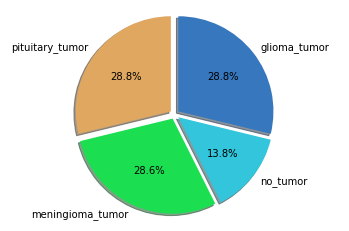

In [17]:
train_labels = images_per_class_training.keys()
train_sizes = images_per_class_training.values()
train_explode = (0.05, 0.05, 0.05, 0.05)

fig1, ax1 = plt.subplots()
ax1.pie(train_sizes, explode = train_explode, labels = train_labels, autopct = '%1.1f%%', colors = ['#e0a760','#1bde50','#32c5db','#3777bd'], 
        shadow = True, startangle = 90)
ax1.axis('equal')

plt.show()

In [18]:
images_per_class_testing = {}
for folder in os.listdir("dataset/Testing"):
  images_per_class_testing[folder] = len(os.listdir(f'dataset/Testing/{folder}'))

print(images_per_class_testing)

{'pituitary_tumor': 74, 'meningioma_tumor': 115, 'no_tumor': 105, 'glioma_tumor': 100}


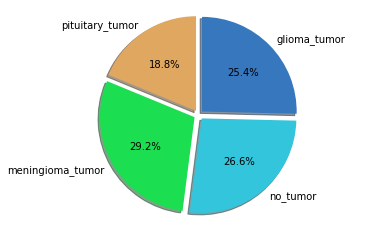

In [19]:
test_labels = images_per_class_testing.keys()
test_sizes = images_per_class_testing.values()
test_explode = (0.05, 0.05, 0.05, 0.05)

fig2, ax2 = plt.subplots()
ax2.pie(test_sizes, explode = test_explode, labels = test_labels, autopct = '%1.1f%%', colors = ['#e0a760','#1bde50','#32c5db','#3777bd'], 
        shadow = True, startangle = 90)
ax2.axis('equal')

plt.show()

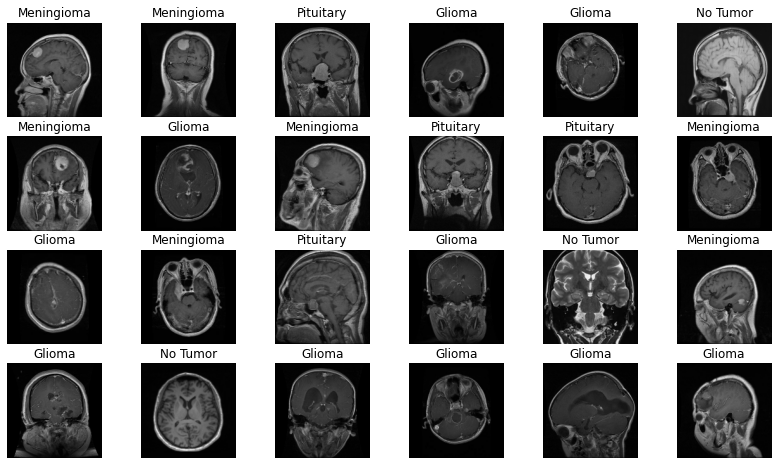

In [20]:
plt.figure(figsize=(14,8))
for images, labels in train_dataset.take(1):
  for i in range(24):
    ax = plt.subplot(4, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(image_classes[int(labels[i])])
    plt.axis("off")

## Modeling

In [21]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes)
])

In [22]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0

In [24]:
classifier = model.fit(train_dataset, validation_data=test_dataset, epochs=10, batch_size=batch_size)

Epoch 1/10
90/90 [==============================] - 37s 78ms/step - loss: 0.8979 - accuracy: 0.6063 - val_loss: 1.8181 - val_accuracy: 0.4315
Epoch 2/10
90/90 [==============================] - 7s 70ms/step - loss: 0.4949 - accuracy: 0.7997 - val_loss: 1.9458 - val_accuracy: 0.4772
Epoch 3/10
90/90 [==============================] - 7s 70ms/step - loss: 0.2951 - accuracy: 0.8868 - val_loss: 2.0746 - val_accuracy: 0.6650
Epoch 4/10
90/90 [==============================] - 7s 69ms/step - loss: 0.1934 - accuracy: 0.9275 - val_loss: 2.4446 - val_accuracy: 0.6497
Epoch 5/10
90/90 [==============================] - 7s 69ms/step - loss: 0.1180 - accuracy: 0.9561 - val_loss: 2.1831 - val_accuracy: 0.6904
Epoch 6/10
90/90 [==============================] - 7s 69ms/step - loss: 0.0740 - accuracy: 0.9742 - val_loss: 2.8052 - val_accuracy: 0.6954
Epoch 7/10
90/90 [==============================] - 7s 74ms/step - loss: 0.0541 - accuracy: 0.9843 - val_loss: 3.3171 - val_accuracy: 0.7056
Epoch 8/10
9

In [25]:
def preds_and_trues(model_used, dataset):
  trues = []
  preds = []
  for input, labels in dataset:
    batch_predictions = model_used.predict(x=input)
    for pred in batch_predictions:
      preds.append(np.argmax(tf.nn.softmax(pred)))
    for label in labels:
      trues.append(int(label))
  return trues, preds

In [26]:
def confusion_dataframe(model, val_dataset):
  trues, preds = preds_and_trues(model, val_dataset)
  confusion = confusion_matrix(y_true=trues, y_pred=preds)
  confusion_df = pd.DataFrame(confusion, index=class_labels, columns=class_labels)

  return confusion_df

In [27]:
def heatmap(confusion_matrix, name):
  fig, ax = plt.subplots(figsize=(11, 9))
  sns.heatmap(confusion_matrix, annot=True, cmap="Purples", vmin=0, vmax=120, square=True, linewidths=0.8, fmt='g', 
              xticklabels=class_labels, yticklabels=class_labels, annot_kws={'fontsize':15})
  ax.xaxis.tick_top()

  plt.xlabel('Predicted')
  plt.ylabel('Actual')

  title = f'{name} Performance\n'.upper()
  plt.title(title, loc='left')
  plt.show()

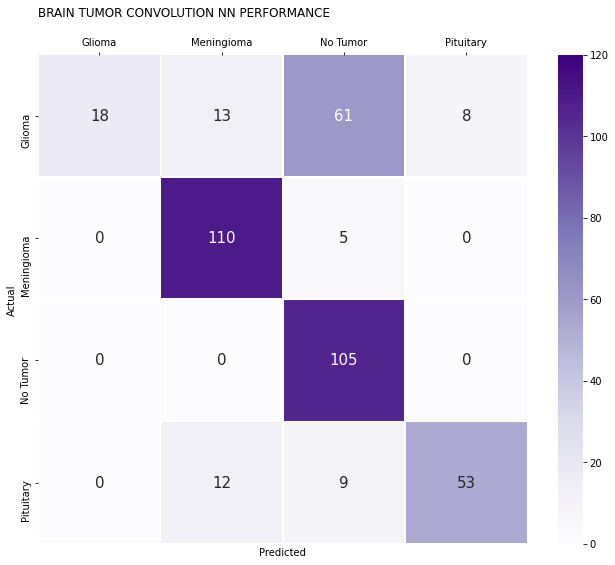

In [28]:
cnn_df = confusion_dataframe(model, test_dataset)
heatmap(cnn_df, 'Brain Tumor Convolution NN')